[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HSinger04/VOGUE-Reimplementation/blob/main/cryu854/StyleGAN2Test.ipynb)

In [ ]:
#!pip3 install tensorflow==2.3.0

     |████████████████████████████████| 320.4MB 53kB/s 
     |████████████████████████████████| 460kB 17.2MB/s 
     |████████████████████████████████| 20.1MB 1.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [1]:
%cd /content
!git clone https://github.com/HSinger04/VOGUE-Reimplementation

/content
Cloning into 'VOGUE-Reimplementation'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 414 (delta 70), reused 0 (delta 0), pack-reused 303
Receiving objects: 100% (414/414), 83.80 MiB | 46.01 MiB/s, done.
Resolving deltas: 100% (236/236), done.


In [2]:
%cd /content/VOGUE-Reimplementation/cryu854/

/content/VOGUE-Reimplementation/cryu854


In [3]:
!mkdir data

In [5]:
!pwd

/content/VOGUE-Reimplementation/cryu854


# Loading trained model

## Mount drive for access to weight directory

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Actually load the model

In [12]:
import tensorflow as tf
from modules.generator import generator

resolution = 1024  
config = "f"
num_labels = 0
checkpoint_path = "/content/drive/MyDrive/Lernen/Coxi/IANNwTF/official_1024x1024/"

Gs = generator(resolution, num_labels, config, randomize_noise=False)
ckpt = tf.train.Checkpoint(generator_clone=Gs)
print(f'Loading network from {checkpoint_path}...')
ckpt.restore(tf.train.latest_checkpoint(checkpoint_path)).expect_partial()

Loading network from /content/drive/MyDrive/Lernen/Coxi/IANNwTF/official_1024x1024/...


## Generate images

In [21]:
truncation_psi = 0.5
batch_size = 5
latents = tf.random.normal([batch_size, 512])
# TODO: from _get_labels
labels_indice = [0]*batch_size
labels = tf.zeros([batch_size, 0], tf.float32)
images = Gs([latents, labels], truncation_psi, training=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


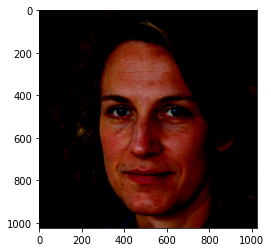

In [22]:
from matplotlib import pyplot as plt

images = images.numpy()
for i in range(batch_size):
    plt.imshow(images[i])

# Image resizing

In [ ]:
# !mkdir original

Now, add images to "original"

In [ ]:
# import os

# directory = "./original"

# for filename in os.listdir(directory):
#     if filename.endswith(".png"):
#         temp = tf.keras.preprocessing.image.load_img(directory + "/" + filename, 
#                                                      target_size=(256, 256),
#                                                      interpolation="bilinear")
#         tf.keras.preprocessing.image.save_img("./data/" + filename, temp)        

In [ ]:
# TODO: create directories

In [ ]:
#x = tf.ones((1, 128, 128, 3))

In [ ]:
%cd /content/VOGUE-Reimplementation/cryu854/
# Pull changes
!git pull
# TODO: --impl
!python3 main.py train --dataset_name ffhq --dataset_path ./data --batch_size 4 --config e --impl ref

/content/VOGUE-Reimplementation/cryu854
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.
From https://github.com/HSinger04/VOGUE-Reimplementation
   a5ab8f8..1647b3e  main       -> origin/main
Updating a5ab8f8..1647b3e
Fast-forward
 cryu854/modules/losses.py   |   6 +-
 cyru854/StyleGAN2Test.ipynb | 423 ++++++++++++++++++++++++++++++++++++++++++++
 2 files changed, 426 insertions(+), 3 deletions(-)
 create mode 100644 cyru854/StyleGAN2Test.ipynb
2021-03-17 11:32:28.681756: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Creating ffhq dataset...
2021-03-17 11:32:29.847153: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-03-17 11:32:29.876495: I tensorflow/stream_executor/